# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [3]:
rng = numpy.random
rng

<module 'numpy.random' from '/Users/guanhua/opt/miniconda3/envs/tf1.15-py36-with-jupyter-extension/lib/python3.6/site-packages/numpy/random/__init__.py'>

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
# Training Data
train_X = numpy.asarray([
    3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791,
    5.313, 7.997, 5.654, 9.27, 3.1
])
train_Y = numpy.asarray([
    1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827,
    3.465, 1.65, 2.904, 2.42, 2.94, 1.3
])
n_samples = train_X.shape[0]

In [6]:
train_X

array([ 3.3  ,  4.4  ,  5.5  ,  6.71 ,  6.93 ,  4.168,  9.779,  6.182,
        7.59 ,  2.167,  7.042, 10.791,  5.313,  7.997,  5.654,  9.27 ,
        3.1  ])

In [7]:
train_Y

array([1.7  , 2.76 , 2.09 , 3.19 , 1.694, 1.573, 3.366, 2.596, 2.53 ,
       1.221, 2.827, 3.465, 1.65 , 2.904, 2.42 , 2.94 , 1.3  ])

In [8]:
n_samples

17

In [11]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [12]:
X

<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>

In [13]:
# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [14]:
W

<tf.Variable 'weight:0' shape=() dtype=float32_ref>

In [15]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [16]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [17]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.456715643 W= 0.5939579 b= -1.6758658
Epoch: 0100 cost= 0.412861824 W= 0.57347655 b= -1.5285263
Epoch: 0150 cost= 0.374071389 W= 0.5542142 b= -1.3899517
Epoch: 0200 cost= 0.339758784 W= 0.5360968 b= -1.2596163
Epoch: 0250 cost= 0.309408545 W= 0.5190572 b= -1.137035
Epoch: 0300 cost= 0.282562226 W= 0.5030308 b= -1.021743
Epoch: 0350 cost= 0.258815616 W= 0.4879578 b= -0.91330844
Epoch: 0400 cost= 0.237811029 W= 0.47378126 b= -0.8113232
Epoch: 0450 cost= 0.219231784 W= 0.46044776 b= -0.7154034
Epoch: 0500 cost= 0.202797800 W= 0.44790727 b= -0.6251878
Epoch: 0550 cost= 0.188261628 W= 0.43611264 b= -0.5403383
Epoch: 0600 cost= 0.175404072 W= 0.42501953 b= -0.46053508
Epoch: 0650 cost= 0.164031371 W= 0.41458607 b= -0.38547793
Epoch: 0700 cost= 0.153972074 W= 0.40477327 b= -0.31488508
Epoch: 0750 cost= 0.145074561 W= 0.39554396 b= -0.2484904
Epoch: 0800 cost= 0.137204632 W= 0.38686356 b= -0.18604416
Epoch: 0850 cost= 0.130243748 W= 0.37869957 b= -0.1273122
Epoch: 0900 cost=

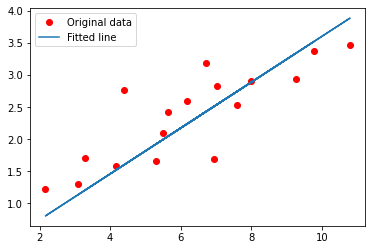

In [20]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

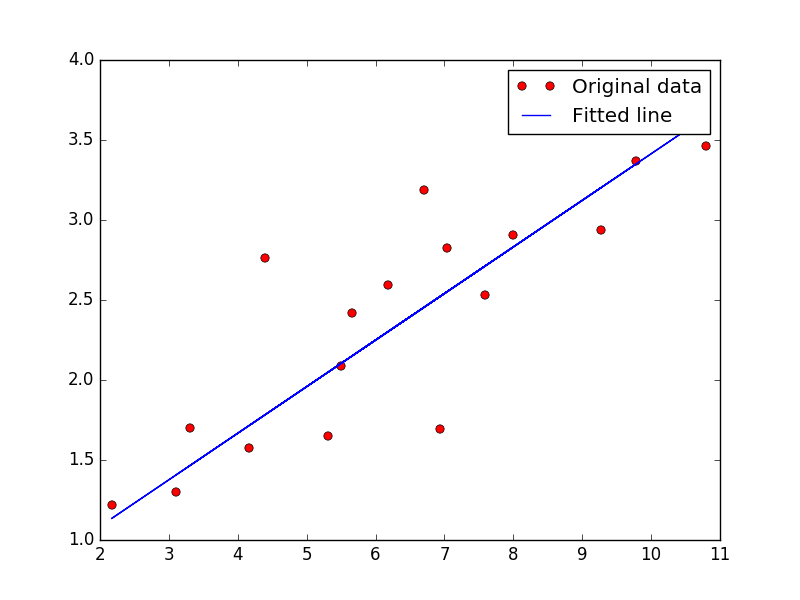

In [1]:
# Regression result